Точность модели на тестах = 0.25


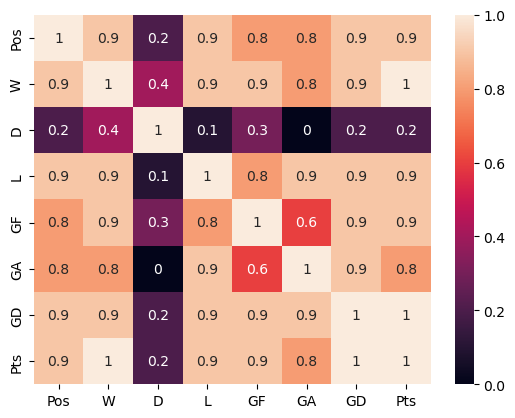

In [24]:
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

dataset = pd.read_csv("EPL Standings 2000-2022.csv")

for column in dataset:
    if type(dataset[column][0]) is str:
        dataset[column] = pd.factorize(dataset[column])[0]
        
dataset = dataset.drop("Season", axis = 1)
dataset = dataset.drop("Team", axis = 1)
dataset = dataset.drop("Qualification or relegation", axis = 1)
dataset = dataset.drop("Pld", axis = 1)
        
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot = True,
)

train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop("Pos", axis = 1),
    dataset["Pos"],
    test_size = 0.1
)

model = GaussianNB()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)

print(f"Точность модели на тестах = {accuracy}")